In [1]:
import pandas as pd
import glob, os, csv
import matplotlib.pyplot as plt

market_list = ['cypher-market', 'white-house-market', 'yellow-brick']

df_all_ls = []
for market in market_list:
    path = '../../data/' + market + '/page-scrapes/'
    all_files = glob.glob(os.path.join(path, '*.csv'))
    df_ls = []
    
    for filename in all_files:
        df = pd.read_csv(filename, index_col=False, header=0)
        df = df[['Product', 'Vendor', 'Price in AUD']]
        df['Market'] = market
        df_ls.append(df)
    
    df_all_sub = pd.concat(df_ls, axis=0, ignore_index=True)
    df_all_ls.append(df_all_sub)
df_market = pd.concat(df_all_ls, axis=0, ignore_index=True)
df_market.drop_duplicates(['Product', 'Vendor'], keep='last', inplace=True)

In [2]:
# Dictionary to store the all the drug name slangs
drug_slang_words = {}
for filename in glob.glob('drug-slang-words/*.csv'):
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        drug_slang_words[filename[(len('drug-slang-words')+1):-4]] = sum(list(reader), [])

In [3]:
# Thorough search with the dictionary of drug name slangs
# Keep the extracted rows
df_market_copy = df_market.copy()
df_market_copy = df_market_copy.reset_index()
df_drugs = pd.DataFrame()
for drug_type in drug_slang_words.keys():
    counter = 0
    search_keywords = '|'.join(drug_slang_words[drug_type])
    filter_drugs_index = df_market_copy['Product'].str.contains(search_keywords, case=False, na=False)
    filter_drugs = df_market_copy[filter_drugs_index].copy()
    if filter_drugs_index.any:
        counter += filter_drugs.shape[0]
        filter_drugs['Label'] = drug_type
        df_drugs = df_drugs.append(filter_drugs)
df_drugs

,index,Product,Vendor,Price in AUD,Market,Label
855,1579,★[EU✈WW] Sandoz Tramadol★ 200 mg★ Opiates orig...,Hilfiger,90.00,cypher-market,GHB
856,1580,★[EU✈WW] Sandoz Tramadol★ 200 mg★ Opiates orig...,Hilfiger,90.00,cypher-market,GHB
963,1753,TOM's GHB 99.9% PURITY VERY HIGH QUALITY (~0.9...,TheOxyMen,0.67,cypher-market,GHB
982,1782,"★[EU✈WW]★Pfizer Xanax★ 0,5mg 100 pills origina...",Hilfiger,95.00,cypher-market,GHB
984,1784,Toseina 250ml Lean Sirup Original Sealed Versa...,WardoGmbH,145.60,cypher-market,GHB
...,...,...,...,...,...,...
3996,5913,Vicodin 10/325 USA Pharmaceutical Grade Hydroc...,DigitalMafia,23.05,yellow-brick,hydrocodone
4007,5929,"500 mg DPT Hydrochloride || N,N-Dipropyltrypta...",DutchDrugz,63.37,yellow-brick,hydrocodone
4016,5943,5grams Premium Handrolled Organic Manali Cream,danhash,110.90,yellow-brick,hydrocodone
4018,5946,10grams Premium Handrolled Organic Manali Cream,danhash,230.45,yellow-brick,hydrocodone


In [4]:
# Count the number of listings of each type of drug
df_drugs_grouped = df_drugs[['Product', 'Label']].groupby(['Label']).count()
df_drugs_grouped = df_drugs_grouped.sort_values(by=['Product'], ascending=False)
df_drugs_grouped.reset_index(inplace=True)

In [5]:

# Listings grouped by market
df_drugs_grouped_3 = df_drugs[['Product', 'Market']].groupby(['Market']).count()
df_drugs_grouped_3 = df_drugs_grouped_3.sort_values(by=['Product'], ascending=False)
df_drugs_grouped_3.reset_index(inplace=True)

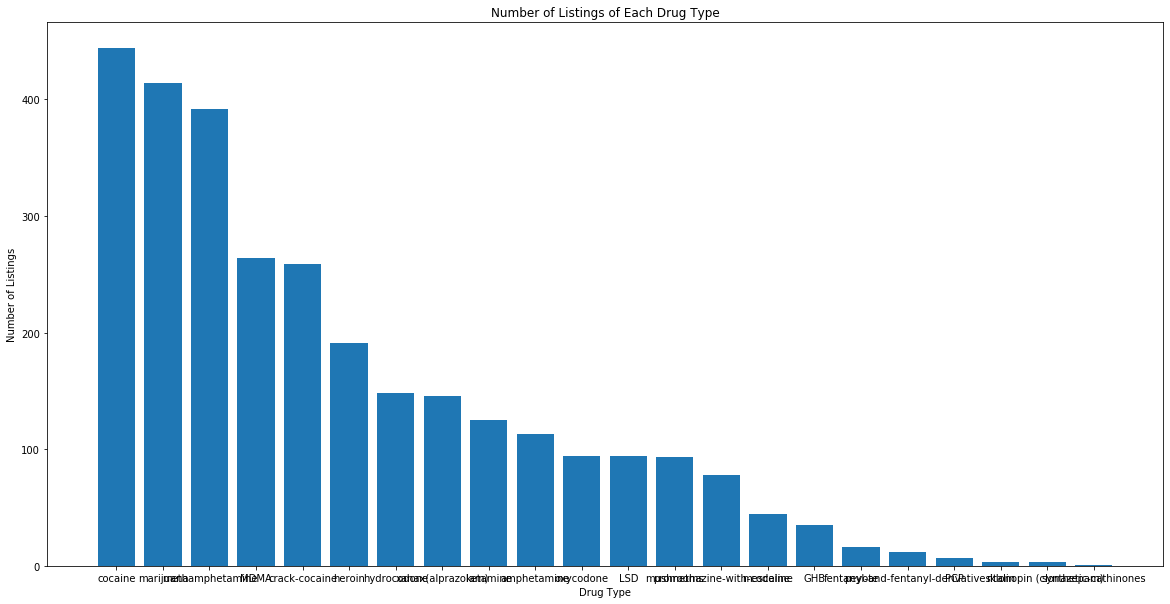

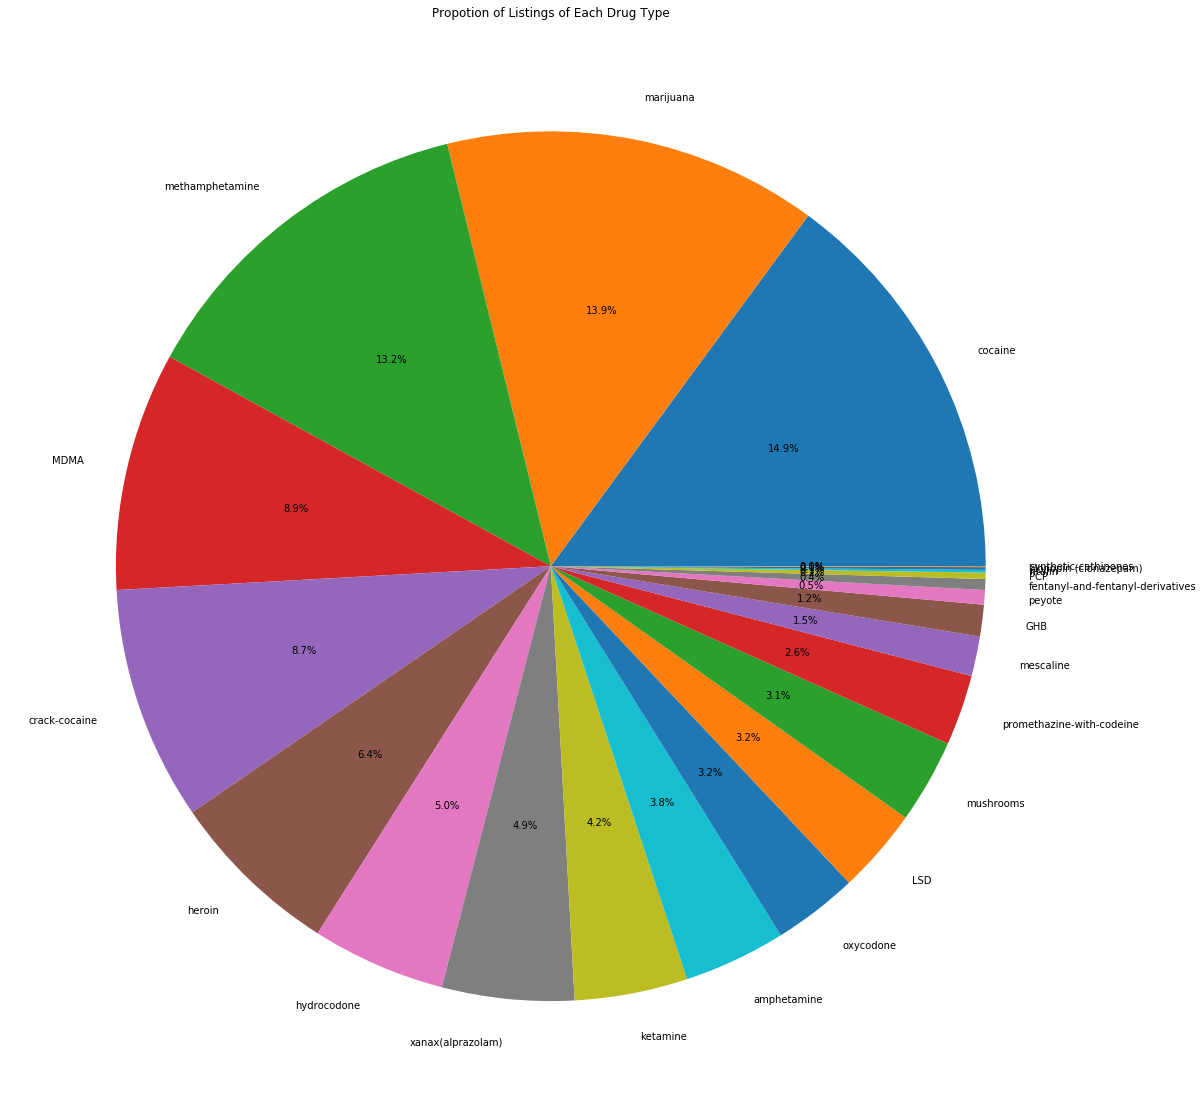

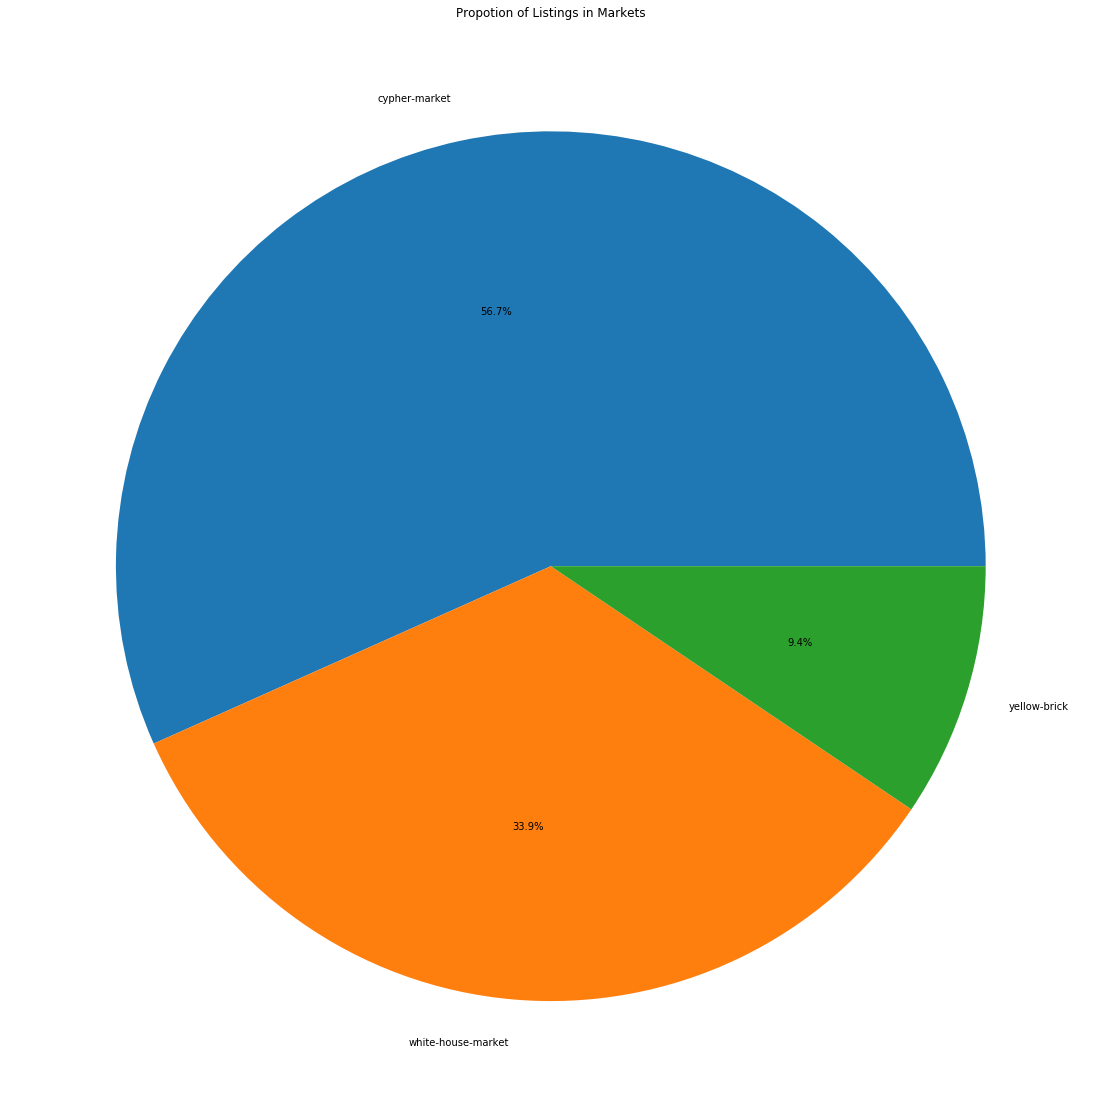

In [6]:
# Number of Listings of All Drug Types
plt.figure(figsize=(20,10))
plt.bar(df_drugs_grouped['Label'], df_drugs_grouped['Product'])
plt.xlabel("Drug Type")
plt.ylabel("Number of Listings")
plt.title("Number of Listings of Each Drug Type")

# Propotion of Listings of All Drug Types
plt.figure(figsize=(20,20))
plt.pie(df_drugs_grouped['Product'], labels=df_drugs_grouped['Label'], autopct='%1.1f%%')
plt.title("Propotion of Listings of Each Drug Type")

# Propotion of Listings in Markets
plt.figure(figsize=(20,20))
plt.pie(df_drugs_grouped_3['Product'], labels=df_drugs_grouped_3['Market'], autopct='%1.1f%%')
plt.title("Propotion of Listings in Markets")

plt.show()